<a href="https://colab.research.google.com/github/Noamalmog97/matala2NOAMALMOG/blob/main/matala2_noamalmog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/Users/noam/Desktop/לימודים/שנה ג/סמסטר ב/פייתון/מטלות להגשה/מטלה 2/"
filename = "matala2_cosmetics_2019-Nov.csv"
datafile = path + filename
data = pd.read_csv(datafile)
data.head()


/var/folders/0d/_4s506zn4wd482595wvxd92c0000gn/T/ipykernel_49911/2248689293.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(datafile)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


## Q1

In [ ]:
data.dtypes

event_time       object
event_type       object
product_id        int64
category_id       int64
category_code    object
brand            object
price            object
user_id           int64
user_session     object
dtype: object

### as we can see, event time's type is object so we will change it to datetime.

In [ ]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].shift(-1) - data['event_time']).dt.seconds.fillna(0)
data.head()

In [ ]:
## Q2

In [ ]:
data = data.sort_values(['user_id', 'event_time'])
data['different_time'] = data.groupby('user_id')['event_time'].diff()
true_or_false = data['different_time'] > timedelta(days=5)
p_t_o_f = true_or_false.groupby(data['user_id']).cumsum()
data['p_t_o_f'] = p_t_o_f
data['funnel_number'] = data['p_t_o_f'] + 1
data = data.drop(['different_time','p_t_o_f'], axis=1)
data.tail()


In [ ]:
data[['funnel_number']].value_counts()

funnel_number
1                3574913
2                 868473
3                 175229
4                  16939
5                    283
dtype: int64

In [ ]:
## Q3

In [ ]:
data['session'] = np.where(data['user_session'].shift() == data['user_session'],0,1)
data['index_in_funnel'] = data.groupby(['user_id','funnel_number'])['session'].cumsum()
data  = data.drop(['session'],axis=1)
data.tail()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
4635733,2019-11-30 23:56:14,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,-3.0,1,1
4635736,2019-11-30 23:56:17,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,-4.0,1,1
4635737,2019-11-30 23:56:21,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0,1,1
4635752,2019-11-30 23:56:46,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0,1,1
4635836,2019-11-30 23:59:58,view,5880201,2029731308699124089,NaN,rasyan,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b,0.0,1,1


In [ ]:
## Q4

In [ ]:
data['price'] = data['price'].astype(str)
data['price'] = data['price'].str.extract('(\d+\.\d+)').astype(float)
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
2483241,2019-11-19 09:56:09,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0,1,1
2494623,2019-11-19 11:14:48,view,5814066,1487580005855658874,NaN,grattol,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0,1,2
2640971,2019-11-20 11:58:06,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,-21.0,1,3
2641003,2019-11-20 11:58:27,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,-72.0,1,3


In [ ]:
## Q5

<AxesSubplot:xlabel='event_type', ylabel='count'>

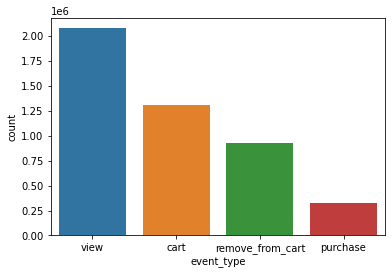

In [ ]:
sns.countplot(x='event_type', data=data)

In [ ]:
## Q6

In [ ]:
data.sort_values(by=['event_time'],inplace = True)
data['list_of_view'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'view' else None, axis=1)
data['list_of_added_to_cart'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'cart' else None, axis=1)
data['list_of_purchased'] = data.apply(lambda row: row['product_id'] if row['event_type'] == 'purchase' else None, axis=1)
data['events_per_visit'] = data.groupby(['user_id', 'user_session'])['event_type'].transform('count')
session_duration = data[['user_session', 'duration_to_next_event']].groupby('user_session').sum()
session_duration = session_duration.rename(columns={'duration_to_next_event': 'session_duration'})
data = data.merge(session_duration, on='user_session', how='left')


session_data = data.groupby(['user_id', 'user_session','funnel_number','index_in_funnel','events_per_visit','session_duration']).agg({'list_of_view': lambda x: list(x.dropna()),'list_of_added_to_cart': lambda x: list(x.dropna()),'list_of_purchased': lambda x: list(x.dropna()),}).reset_index()
session_data

,user_id,user_session,funnel_number,index_in_funnel,events_per_visit,session_duration,list_of_view,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240.0],[],[]
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,2,1.0,0.0,[5814066.0],[],[]
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,3,28.0,-3789.0,"[5800358.0, 5800349.0, 5800349.0, 5800358.0, 5...",[],[]
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,4,1.0,0.0,[5711087.0],[],[]
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5711145.0],[],[]
...,...,...,...,...,...,...,...,...,...
1005111,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,1.0,0.0,[5881428.0],[],[]
1005112,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,1.0,0.0,[5873630.0],[],[]
1005113,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,5.0,-38.0,"[5892179.0, 5886282.0, 5892179.0, 5900651.0, 5...",[],[]
1005114,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,1.0,0.0,[5790563.0],[],[]
